# Data Set Description
Citation Request:

This dataset is public available for research. The details are described in [Cortez et al., 2009]. 
Please include this citation if you plan to use this database:

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547* 553. ISSN: 0167* 9236.

Available at: 
- [Elsevier](http://dx.doi.org/10.1016/j.dss.2009.05.016)
- [Pre* press](http://www3.dsi.uminho.pt/pcortez/winequality09.pdf)
- [bib](http://www3.dsi.uminho.pt/pcortez/dss09.bib)

- Sources
Created by: Paulo Cortez (Univ. Minho), Antonio Cerdeira, Fernando Almeida, Telmo Matos and Jose Reis (CVRVV) @ 2009
   
- Past Usage:

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547* 553. ISSN: 0167-9236.

In the above reference, two datasets were created, using red and white wine samples.
The inputs include objective tests (e.g. PH values) and the output is based on sensory data
(median of at least 3 evaluations made by wine experts). Each expert graded the wine quality 
between 0 (very bad) and 10 (very excellent). Several data mining methods were applied to model
these datasets under a regression approach. The support vector machine model achieved the
best results. Several metrics were computed: MAD, confusion matrix for a fixed error tolerance (T),
etc. Also, we plot the relative importances of the input variables (as measured by a sensitivity
analysis procedure).
 
Relevant Information:

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine.
For more details, consult: http://www.vinhoverde.pt/en/ or the reference [Cortez et al., 2009].
Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables 
are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks.
The classes are ordered and not balanced (e.g. there are munch more normal wines than
excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent
or poor wines. Also, we are not sure if all input variables are relevant. So
it could be interesting to test feature selection methods. 

- Number of Instances: red wine - 1599; white wine - 4898. 
- Number of Attributes: 11 + output attribute
  
Note: several of the attributes may be correlated, thus it makes sense to apply some sort of
feature selection.

- Attribute information:

For more information, read Cortez et al., 2009.


# Variables

## Features

- fixed acidity
- volatile acidity
- citric acid
- residual sugar
- chlorides
- free sulfur dioxide
- total sulfur dioxide
- density
- pH
- sulphates
- alcohol

## Target
- quality (score between 0 and 10)

# Analysis Introduction


Given the feature set, I can think of a few different analysis tasks one could do:
    
- Given a feature set, can you predict whether or not a wine is read or white?
- Can you classify a wine by quality given a feature set?
- Can you predict the alcohol in a wine?

# Data Exploration

In [16]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns

## Load the Data, Check The Data, Merge White & Red Wines
White wines will get a wine_type classification of 1, red wine will get a wine_type classification of 0.

In [3]:
%%bash
find ./data/*.csv 

./data/winequality-red.csv
./data/winequality-white.csv


In [4]:
wine_files = !find ./data | grep csv 

In [5]:
print(wine_files)

['./data/winequality-red.csv', './data/winequality-white.csv']


In [6]:
df_white = pd.read_csv('./data/winequality-white.csv', delimiter=';')
df_red = pd.read_csv('./data/winequality-red.csv', delimiter=';')
df_white['wine_type'] = 1
df_red['wine_type'] = 0
print("White Wines", len(df_white), "Red Wines", len(df_red))
wine_data = df_white.append(df_red)

White Wines 4898 Red Wines 1599


Cool, the data got loaded correctly! Lets check out the first bit of it!

In [7]:
wine_data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
wine_type                 int64
dtype: object

In [8]:
wine_data.head().transpose()
print(wine_data.shape)

(6497, 13)


Awesome! We have a 100% numeric data set. What a dream! We can do anything we fucking want! First step is to look at the the distribution of features. Since white wines were separated from red wines, I'll separate the distribution visualization along that category to see if the feature distribution of white vs red is so different that visually can be differentiated. Secondly, we should be aware that there is a pretty significant class imbalance between white wines (much more) and red wines (much less)

In [22]:
features = list(wine_data.keys())
features.pop(features.index('wine_type'))
print(features)

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


<IPython.core.display.Javascript object>


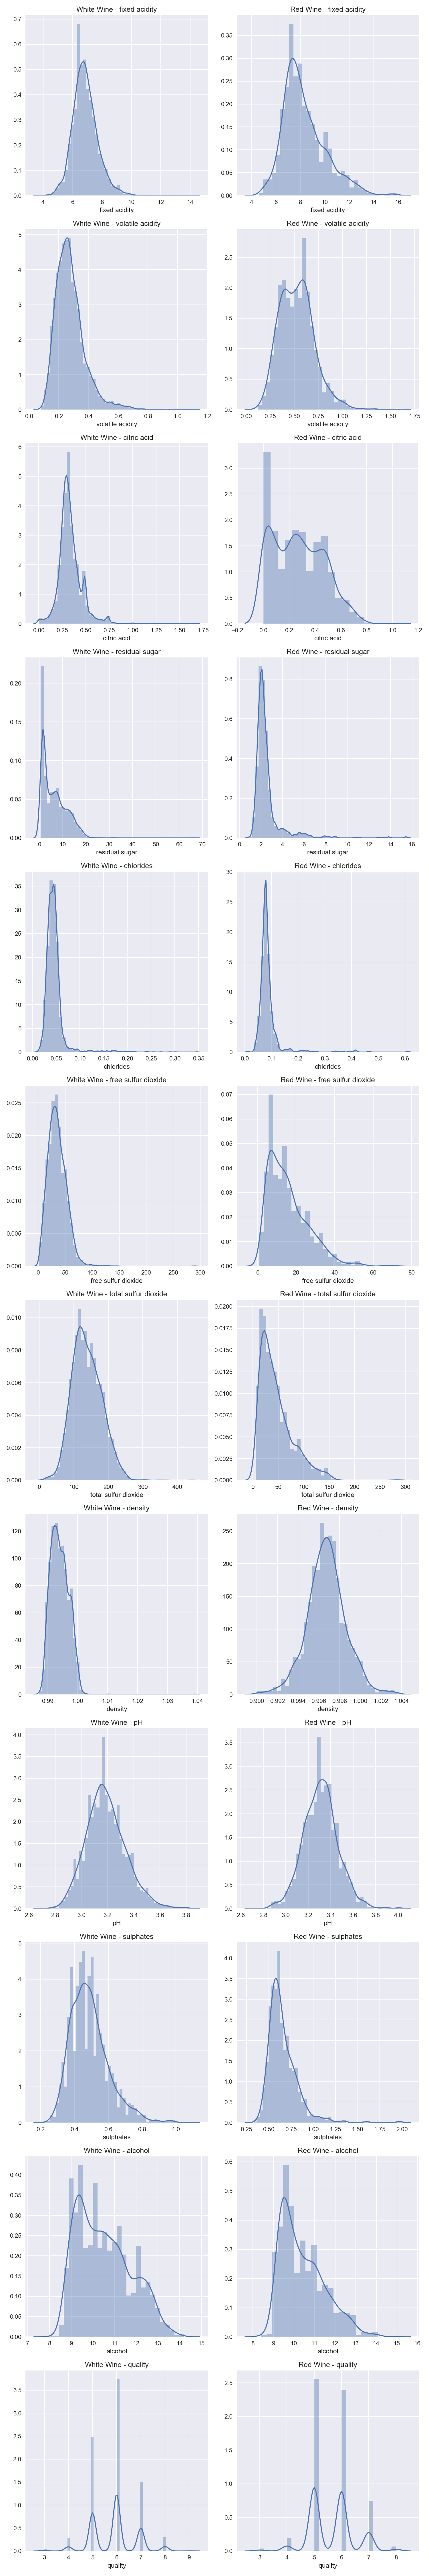

In [23]:
fig, ax = plt.subplots(len(features), 2, figsize=(10,60))
i, j = 0, 0
for feature in features:
    red_wine, white_wine = wine_data[wine_data['wine_type'] == 1], wine_data[wine_data['wine_type'] == 0]
    
    ax[j][0].set_title('White Wine - {}'.format(feature))
    ax[j][1].set_title('Red Wine - {}'.format(feature))
    sns.distplot(red_wine[feature], ax=ax[j][0], hist=True)
    sns.distplot(white_wine[feature], ax=ax[j][1], hist=True)
    
    j += 1
plt.tight_layout()